In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

import matplotlib

from utils.train_utils import train_resnet18, load_data, train_conv_nets, load_data
from utils.visualizations import (
    plot_loss_from_file,
    plot_loss_vs_epoch_from_file,
    load_results,
)

from models.conv_nets import make_convNet
from models.resnet import make_resnet18_UniformHe

# gpus = tf.config.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(gpus[0], True)

In [237]:
import os

path = 'temp/'
new_path = 'experimental_results_cifar10/'

m = {}

for filename in os.listdir(path):
    m.update(pkl.load(open(os.path.join(path, filename), 'rb')))
    
sorted(list(m.keys()), key = lambda x: int(x.split('_')[-1])) 

met = {}

for key in sorted(list(m.keys()), key = lambda x: int(x.split('_')[-1])):
    met[key] = m[key]

In [5]:
def count_trainagle_variables(model):
    total_parameters = 0

    for variable in model.trainable_variables:
        local_parameters = 1
        # For each variable count the number of elements it countains.
        shape = variable.get_shape()
        for i in shape:
            local_parameters *= i
        # sum over all the variables.
        total_parameters += local_parameters
    return total_parameters

In [6]:
depth_3_parameter_counts = []
widths_3 = [i + 1 for i in range(256)]

for k in widths_3:
    model, model_id = make_convNet([32, 32, 3], 3, init_channels=k)
    depth_3_parameter_counts.append(count_trainagle_variables(model))
    
depth_4_parameter_counts = []
widths_4 = [i + 1 for i in range(128)]

for k in widths_4:
    model, model_id = make_convNet([32, 32, 3], 4, init_channels=k)
    depth_4_parameter_counts.append(count_trainagle_variables(model))

depth_5_parameter_counts = []
widths_5 = [i + 1 for i in range(64)]

for k in widths_5:
    model, model_id = make_convNet([32, 32, 3], 5, init_channels=k)
    depth_5_parameter_counts.append(count_trainagle_variables(model))

depth_7_parameter_counts = []
widths_7 = [i + 1 for i in range(16)]

for k in widths_7:
    model, model_id = make_convNet([32, 32, 3], 7, init_channels=k)
    depth_7_parameter_counts.append(count_trainagle_variables(model))

In [79]:
# Short script to clean seperated data files.

import os
path = 'temp'

merge = {}
for file in os.listdir(path):
    merge.update(pkl.load(open(os.path.join(path, file), 'rb')))
    
new_filename = "conv_nets_depth_4_10pct_noise_alpha_0_5.pkl"
pkl.dump(merge, open(os.path.join('experimental_results_cifar10', new_filename), 'wb'))


In [58]:
model, model_id = make_convNet([32, 32, 3], 3, init_channels=50)
depth_3_inter_thresh = count_trainagle_variables(model)

model, model_id = make_convNet([32, 32, 3], 5, init_channels=12)
depth_5_inter_thresh = count_trainagle_variables(model)

model, model_id = make_convNet([32, 32, 3], 7, init_channels=3)
depth_7_inter_thresh = count_trainagle_variables(model)

depth_3_inter_thresh, depth_5_inter_thresh, depth_7_inter_thresh

(50810, 56266, 56860)

In [24]:
resnet_widths = [i + 1 for i in range(64)]
resnet_parameter_count = []

for k in resnet_widths:
    model, model_id = make_resnet18_UniformHe([32, 32, 3], k)
    model.build([128, 32, 32, 3])
    resnet_parameter_count.append(count_trainagle_variables(model))

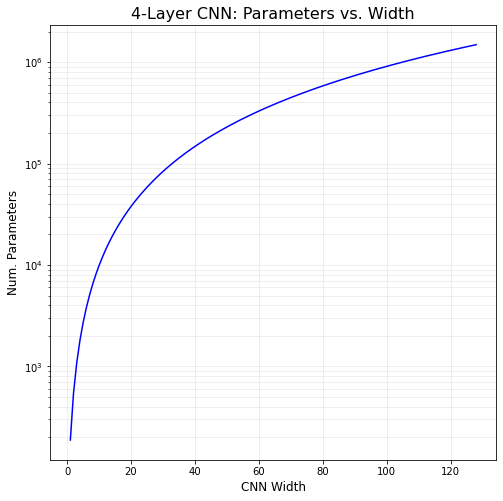

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    
ax.plot(widths_4, depth_4_parameter_counts, c="blue")
ax.set_yscale("log", base=10)
ax.grid(which="both", alpha=0.25)
ax.set_title("4-Layer CNN: Parameters vs. Width", fontsize=16)
ax.set_ylabel("Num. Parameters", fontsize=12)
ax.set_xlabel("CNN Width", fontsize=12)

plt.show()

## Scaling of model size against widthfor CNNs

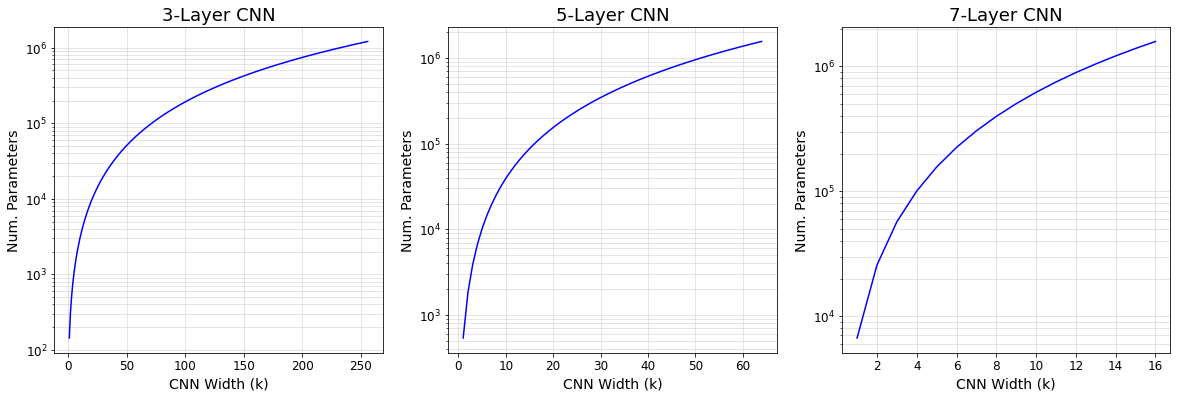

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

d3 = axes[0]
d5 = axes[1]
d7 = axes[2]

d3.plot(widths_3, depth_3_parameter_counts, c="blue")
d3.set_yscale("log", base=10)
d3.grid(which="both", alpha=0.4)
d3.set_title("3-Layer CNN", fontsize=18)
d3.set_ylabel("Num. Parameters", fontsize=14)
d3.set_xlabel("CNN Width (k)", fontsize=14)
d3.tick_params(axis='both', which='major', labelsize=12)

d5.plot(widths_5, depth_5_parameter_counts, c="blue")
d5.set_yscale("log", base=10)
d5.grid(which="both", alpha=0.4)
d5.set_title("5-Layer CNN", fontsize=18)
d5.set_ylabel("Num. Parameters", fontsize=14)
d5.set_xlabel("CNN Width (k)", fontsize=14)
d5.tick_params(axis='both', which='major', labelsize=12)

d7.plot(widths_7, depth_7_parameter_counts, c="blue")
d7.set_yscale("log", base=10)
d7.grid(which="both", alpha=0.4)
d7.set_title("7-Layer CNN", fontsize=18)
d7.set_ylabel("Num. Parameters", fontsize=14)
d7.set_xlabel("CNN Width (k)", fontsize=14)
d7.tick_params(axis='both', which='major', labelsize=12)

plt.show()

fig.savefig('parameter_scales_vs_depth.png', dpi=250)

## Scaling of model size against widthfor ResNets

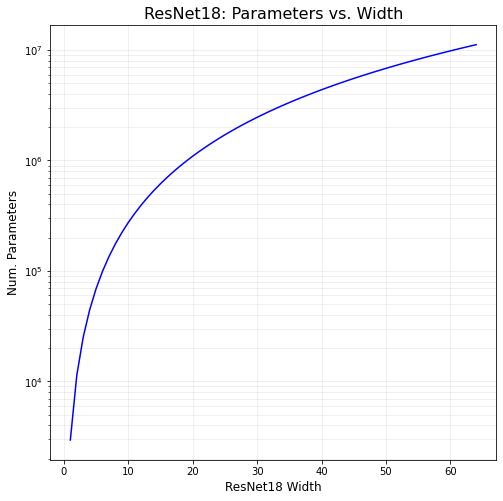

In [26]:
fig, resnet_ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

resnet_ax.plot(resnet_widths, resnet_parameter_count, c="blue")
resnet_ax.set_yscale("log", base=10)
resnet_ax.grid(which="both", alpha=0.25)
resnet_ax.set_title("ResNet18: Parameters vs. Width", fontsize=16)
resnet_ax.set_ylabel("Num. Parameters", fontsize=12)
resnet_ax.set_xlabel("ResNet18 Width", fontsize=12)

plt.show()

## Replicate Figure 5: Test/Train Error at end of training vs Model Width  (Depths 3, 5, & 7)

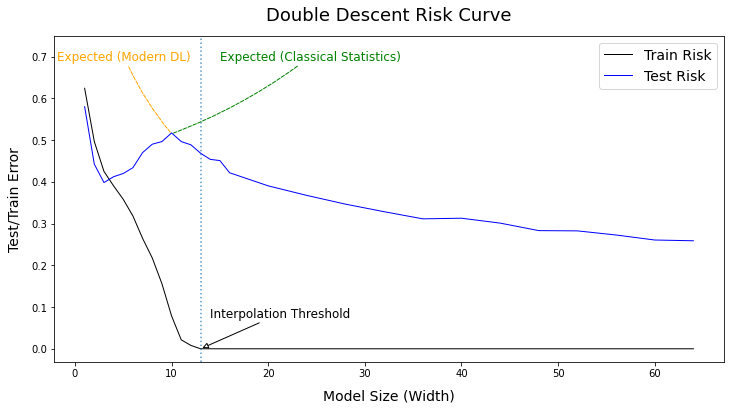

In [160]:
path = "experimental_results_cifar10/"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

fs_label = 14
fs_title = 18

results_10 = load_results(path + f"conv_nets_depth_5_20pct_noise_alpha_1.pkl")
train_10 = results_10.get("accuracy")
test_10 = results_10.get("val_accuracy")
widths = results_10.get("widths")
                          
ax.set_title(
    f"Double Descent Risk Curve", fontsize=fs_title, pad=15
)

ax.plot(
    widths,
    (1 - train_10[:, -1]),
    c="k",
    lw=1,
    label='Train Risk'
)
                       
ax.plot(
    widths,
    (1 - test_10[:, -1]),
    c="blue",
    lw=1,
    label='Test Risk'
)

ax.axvline(x=13, ls=':', alpha=0.75)
ax.annotate(
    "Interpolation Threshold",
    xy=(13, 0.00), 
    xytext=(14, 0.1),
    va="top", 
    ha="left",
    fontsize=12,
    arrowprops=dict(arrowstyle="-|>", fc="w")
)
 
modern_x = np.linspace(start=10, stop=15, num=25)
modern_y = 0.34 + np.power(modern_x, 1.25)/100
ax.annotate(
    "Expected (Classical Statistics)",
    xy=(10, 0.515), 
    xytext=(15, 0.7),
    va="center", 
    ha="left",
    fontsize=12,
    color='green',
    arrowprops=dict(connectionstyle="arc3,rad=-0.075", arrowstyle="-", fc="w", lw=1, ls='--', color='green')
)

ax.annotate(
    "Expected (Modern DL)",
    xy=(10, 0.515), 
    xytext=(12, 0.7),
    va="center", 
    ha="right",
    fontsize=12,
    c='orange',
    arrowprops=dict(connectionstyle="arc3,rad=0.075", arrowstyle="-", fc="w", lw=1, ls='--', color='orange')
)


ax.legend(fontsize=14)

ax.set_ylabel("Test/Train Error", fontsize=fs_label, labelpad=10)
ax.set_xlabel("Model Size (Width)", fontsize=fs_label, labelpad=10)

ax.set_ylim(top=0.75)

plt.savefig('double_descent_riskcurve.png', dpi=250)

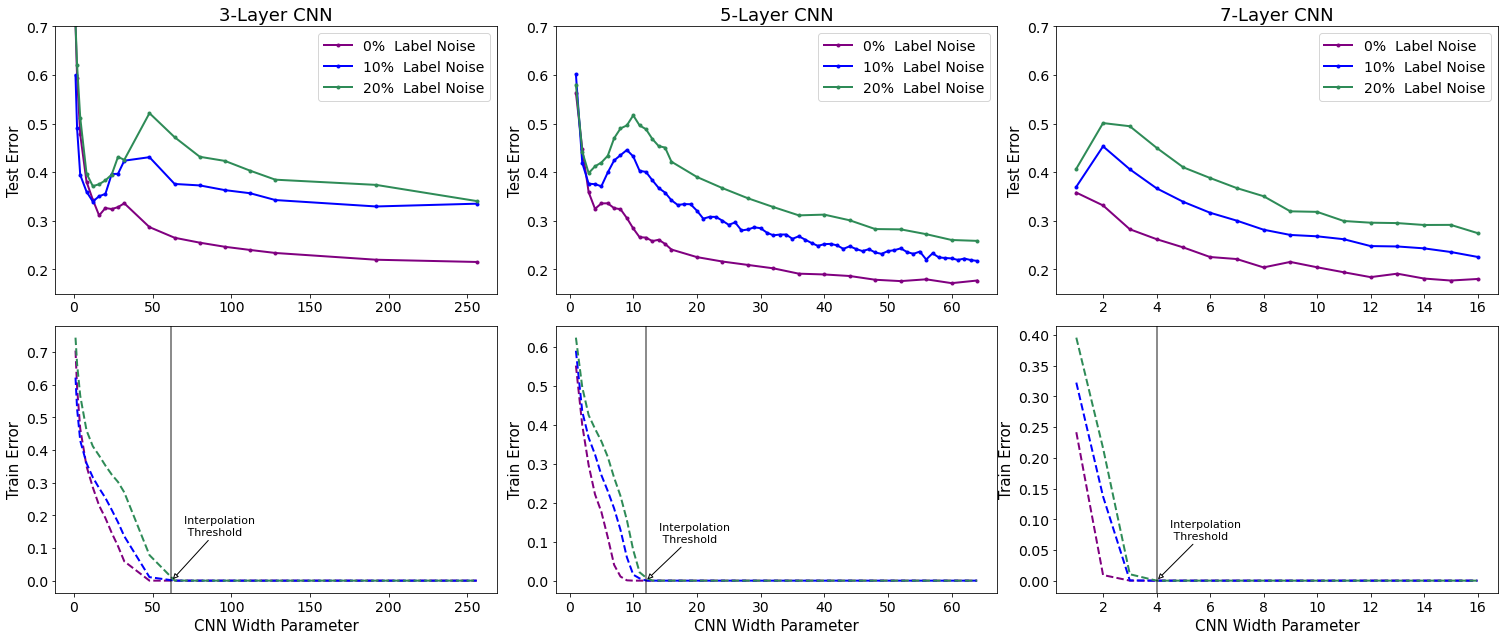

In [98]:
path = "experimental_results_cifar10/"
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(21, 9))

fs_label = 15
fs_title = 18
pad = [8, 2, 0.5]
pad_y = [0.2, 0.15, 0.1]

for axes_idx, depth, thresh in zip([0, 1, 2], [3, 5, 7], [62, 12, 4]):
    results_0 = load_results(path + f"conv_nets_depth_{depth}_0pct_noise_alpha_1.pkl")
    results_10 = load_results(path + f"conv_nets_depth_{depth}_10pct_noise_alpha_1.pkl")
    results_20 = load_results(path + f"conv_nets_depth_{depth}_20pct_noise_alpha_1.pkl")

    train_0 = results_0.get("accuracy")
    train_10 = results_10.get("accuracy")
    train_20 = results_20.get("accuracy")

    test_0 = results_0.get("val_accuracy")
    test_10 = results_10.get("val_accuracy")
    test_20 = results_20.get("val_accuracy")

    test_plt = axes[0][axes_idx]
    train_plt = axes[1][axes_idx]

    test_plt.set_title(
        f"{depth}-Layer CNN", fontsize=fs_title
    )

    test_plt.plot(
        results_0["widths"],
        (1 - test_0[:, -1]),
        label="0%  Label Noise",
        c="purple",
        lw=2,
        marker="o",
        ms=3,
    )
    test_plt.plot(
        results_10["widths"],
        (1 - test_10[:, -1]),
        label="10%  Label Noise",
        c="blue",
        lw=2,
        marker="o",
        ms=3,
    )
    test_plt.plot(
        results_20["widths"],
        (1 - test_20[:, -1]),
        label="20%  Label Noise",
        c="seagreen",
        lw=2,
        marker="o",
        ms=3,
    )
    
    test_plt.legend(fontsize=14)
    test_plt.set_ylabel("Test Error", fontsize=fs_label)

    train_plt.plot(results_0["widths"], (1 - train_0)[:, -1], c="purple", lw=2, ls="--")
    train_plt.plot(results_10["widths"], (1 - train_10)[:, -1], c="blue", lw=2, ls="--")
    train_plt.plot(
        results_20["widths"], (1 - train_20)[:, -1], c="seagreen", lw=2, ls="--"
    )
    train_plt.set_xlabel("CNN Width Parameter", fontsize=fs_label)
    train_plt.set_ylabel("Train Error", fontsize=fs_label)
    
    train_plt.axvline(thresh, c='k', alpha=0.6)
    train_plt.annotate(
            f'Interpolation \n Threshold',
            xy=(thresh, 0.), 
            xytext=(thresh + pad[axes_idx], pad_y[axes_idx]),
            va="top", 
            ha="left",
            fontsize=11,
            arrowprops=dict(arrowstyle="-|>", ls='-', fc="w")
    )
    
    test_plt.tick_params(axis='both', which='major', labelsize=14)
    train_plt.tick_params(axis='both', which='major', labelsize=14)
    
    test_plt.set_ylim(0.15, 0.70)

fig.tight_layout()
fig.savefig('double_descent_across_depths.png', dpi=250)
plt.show()

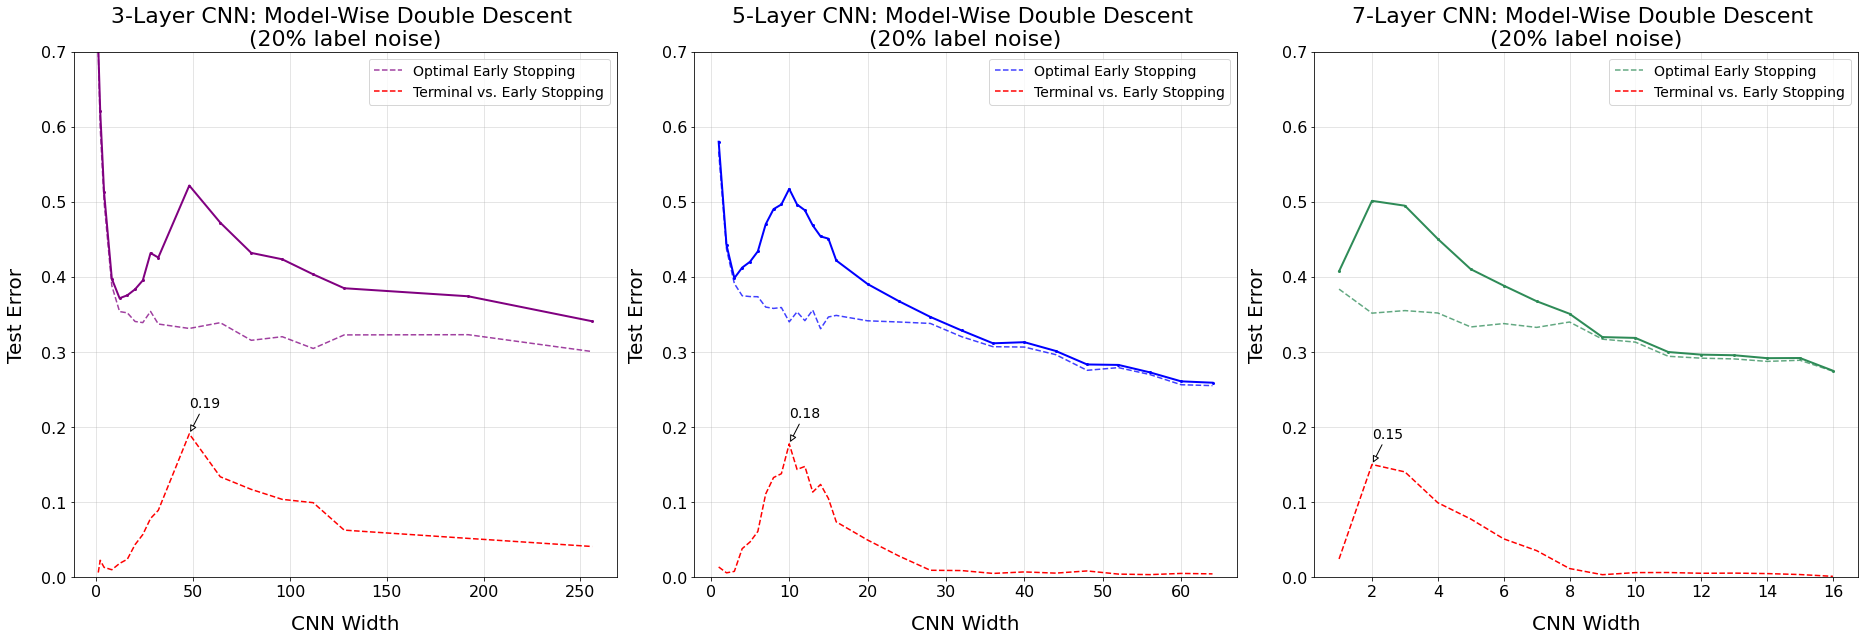

In [32]:
path = "experimental_results_cifar10/"

def plot_early_stopping_gap(
    noise, 
    fs_label=16,
    fs_legend=14,
    fs_title=20,
    fs_annotate=13,
    fs_tick=13
):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(26, 9))

    d3 = axes[0]
    d5 = axes[1]
    d7 = axes[2]

    results_3 = load_results(path + f"conv_nets_depth_3_{noise}pct_noise_alpha_1.pkl")
    results_5 = load_results(path + f"conv_nets_depth_5_{noise}pct_noise_alpha_1.pkl")
    results_7 = load_results(path + f"conv_nets_depth_7_{noise}pct_noise_alpha_1.pkl")
    results = [results_3, results_5, results_7]

    test_3 = 1 - results_3.get("val_accuracy")
    test_5 = 1 - results_5.get("val_accuracy")
    test_7 = 1 - results_7.get("val_accuracy")
    test = [test_3, test_5, test_7]

    colors = ['purple', 'blue', 'seagreen']
    depths = [3, 5, 7]

    for color, depth, data, res, ax in zip(colors, depths, test, results, axes):
        ax.plot(res["widths"], data[:, -1], c=color, lw=2, marker="o", ms=2)
        ax.plot(
            res["widths"],
            data.min(axis=1),
            c=color,
            alpha=0.75,
            ls="--",
            label="Optimal Early Stopping",
        )
        ax.plot(
            res["widths"], 
            data[:, -1]-data.min(axis=1),
            c='red',
            ls="--",
            label="Terminal vs. Early Stopping",
        )
        
        peak_diff = (data[:, -1]-data.min(axis=1)).max()
        peak_diff_width = res["widths"][(data[:, -1]-data.min(axis=1)).argmax()]
        ax.annotate(
            f'{peak_diff:.2f}',
            xy=(peak_diff_width, peak_diff), 
            xytext=(peak_diff_width, peak_diff + 0.05),
            va="top", 
            ha="left",
            fontsize=fs_annotate,
            arrowprops=dict(arrowstyle="-|>", fc="w"))
        
        ax.set_title(f"{depth}-Layer CNN: Model-Wise Double Descent \n({noise}% label noise)", fontsize=fs_title)
        ax.set_xlabel("CNN Width", fontsize=fs_label, labelpad=15)
        ax.set_ylabel("Test Error", fontsize=fs_label, labelpad=15)
        
        ax.tick_params(axis='both', which='major', labelsize=fs_tick)
        ax.legend(fontsize=fs_legend)
        ax.grid(alpha=0.4)
        
        ax.set_ylim(0, 0.7)

    fig.tight_layout()
    plt.show()
    
    return fig
    

fig = plot_early_stopping_gap(
    20, 
    fs_label=20,
    fs_legend=14,
    fs_title=22,
    fs_annotate=14,
    fs_tick=16
)

fig.savefig("terminal_vs_early_stopping_20pct_noise.png", dpi=250)

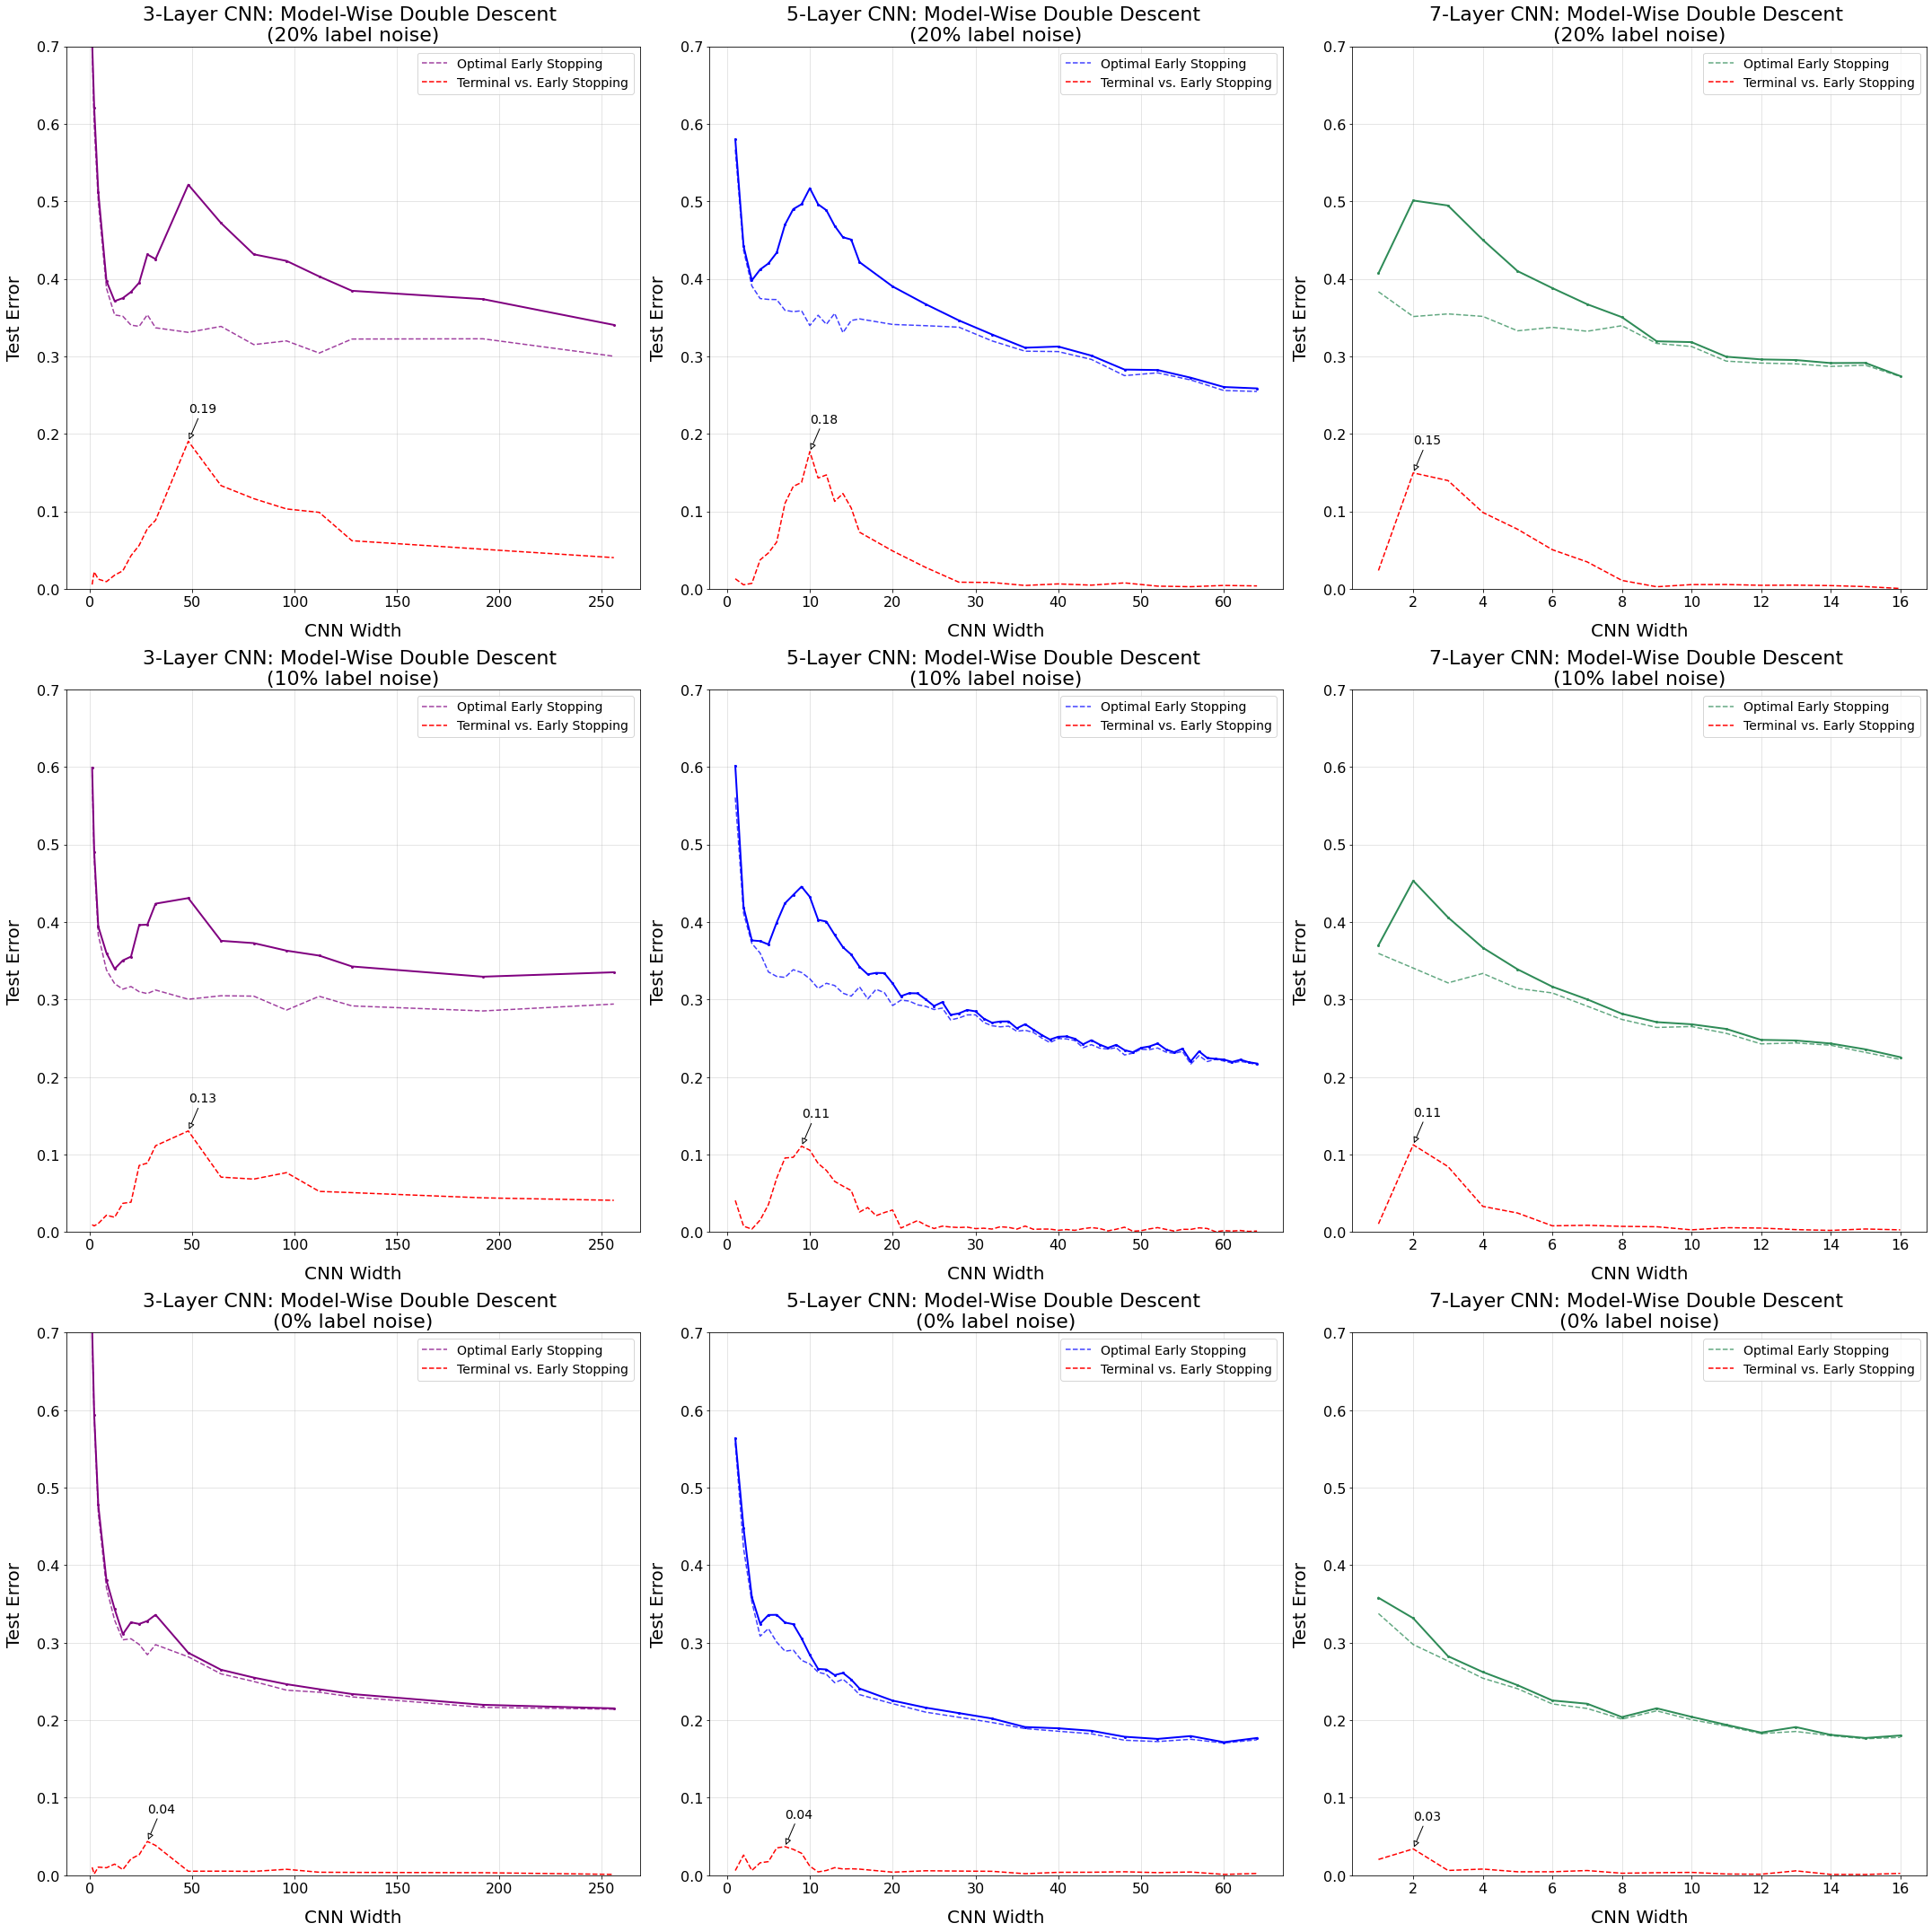

In [46]:
fig, axes_ = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))

fs_label=20
fs_legend=14
fs_title=22
fs_annotate=14
fs_tick=16

for noise, axes in zip([20, 10, 0], axes_):
    d3 = axes[0]
    d5 = axes[1]
    d7 = axes[2]

    results_3 = load_results(path + f"conv_nets_depth_3_{noise}pct_noise_alpha_1.pkl")
    results_5 = load_results(path + f"conv_nets_depth_5_{noise}pct_noise_alpha_1.pkl")
    results_7 = load_results(path + f"conv_nets_depth_7_{noise}pct_noise_alpha_1.pkl")
    results = [results_3, results_5, results_7]

    test_3 = 1 - results_3.get("val_accuracy")
    test_5 = 1 - results_5.get("val_accuracy")
    test_7 = 1 - results_7.get("val_accuracy")
    test = [test_3, test_5, test_7]

    colors = ['purple', 'blue', 'seagreen']
    depths = [3, 5, 7]

    for color, depth, data, res, ax in zip(colors, depths, test, results, axes):
        res["widths"]
        data[:, -1]
        ax.plot(res["widths"], data[:, -1], c=color, lw=2, marker="o", ms=2)
        ax.plot(
            res["widths"],
            data.min(axis=1),
            c=color,
            alpha=0.75,
            ls="--",
            label="Optimal Early Stopping",
        )
        ax.plot(
            res["widths"], 
            data[:, -1]-data.min(axis=1),
            c='red',
            ls="--",
            label="Terminal vs. Early Stopping",
        )

        peak_diff = (data[:, -1]-data.min(axis=1)).max()
        peak_diff_width = res["widths"][(data[:, -1]-data.min(axis=1)).argmax()]
        ax.annotate(
            f'{peak_diff:.2f}',
            xy=(peak_diff_width, peak_diff), 
            xytext=(peak_diff_width, peak_diff + 0.05),
            va="top", 
            ha="left",
            fontsize=fs_annotate,
            arrowprops=dict(arrowstyle="-|>", fc="w"))

        ax.set_title(f"{depth}-Layer CNN: Model-Wise Double Descent \n({noise}% label noise)", fontsize=fs_title)
        ax.set_xlabel("CNN Width", fontsize=fs_label, labelpad=15)
        ax.set_ylabel("Test Error", fontsize=fs_label, labelpad=15)

        ax.tick_params(axis='both', which='major', labelsize=fs_tick)
        ax.legend(fontsize=fs_legend)
        ax.grid(alpha=0.4)

        ax.set_ylim(0, 0.7)

fig.tight_layout()
fig.savefig("terminal_vs_early_stopping_0_10_20pct_noise.png", dpi=250)
plt.show()

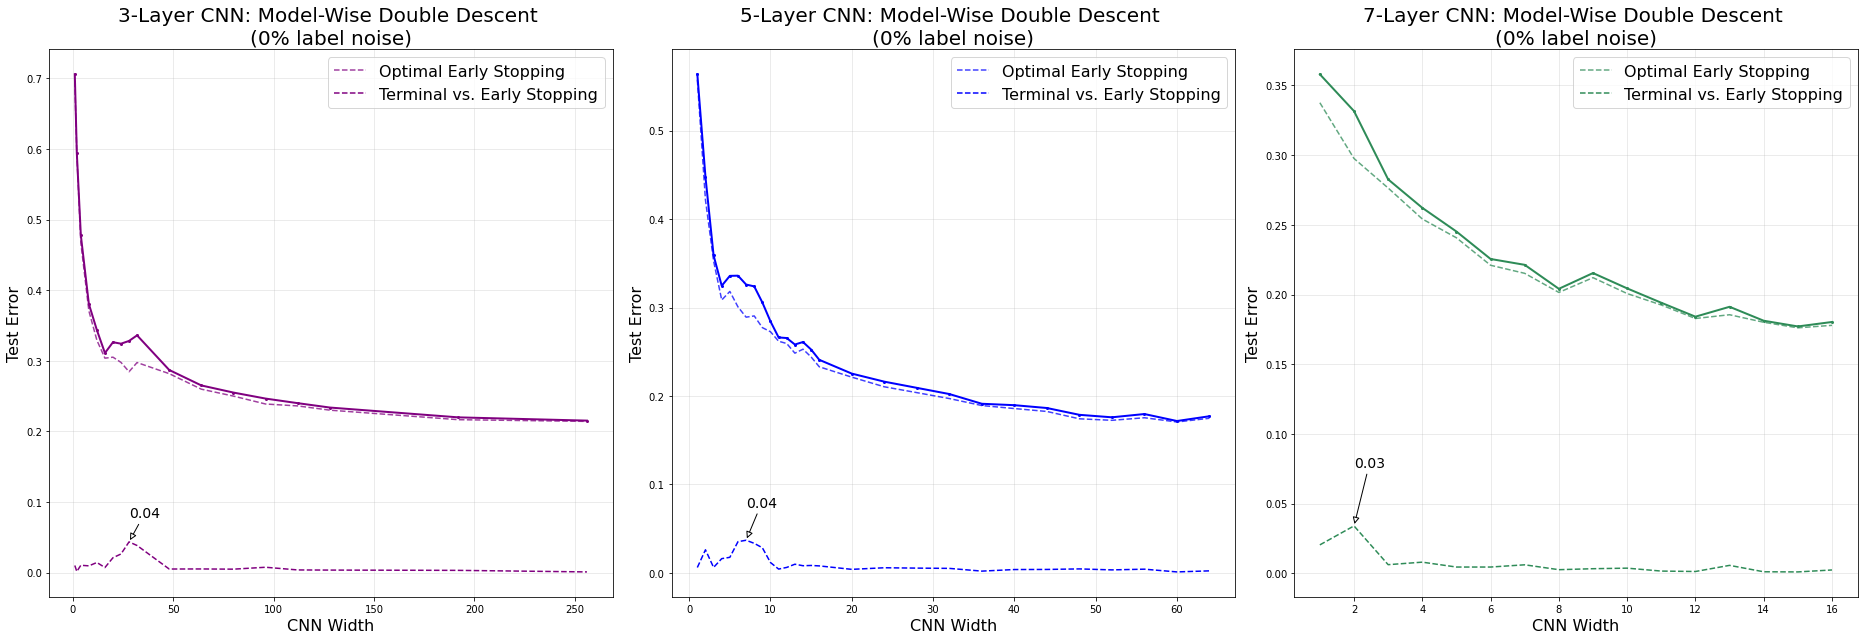

In [45]:
plot_early_stopping_gap(0, 16, 16, 20, 14)

In [76]:
depth = 5
path = "experimental_results_cifar10/"
results_10 = load_results(path + f"conv_nets_depth_{depth}_10pct_noise_alpha_0_1.pkl")

len(results_10['widths'])

28

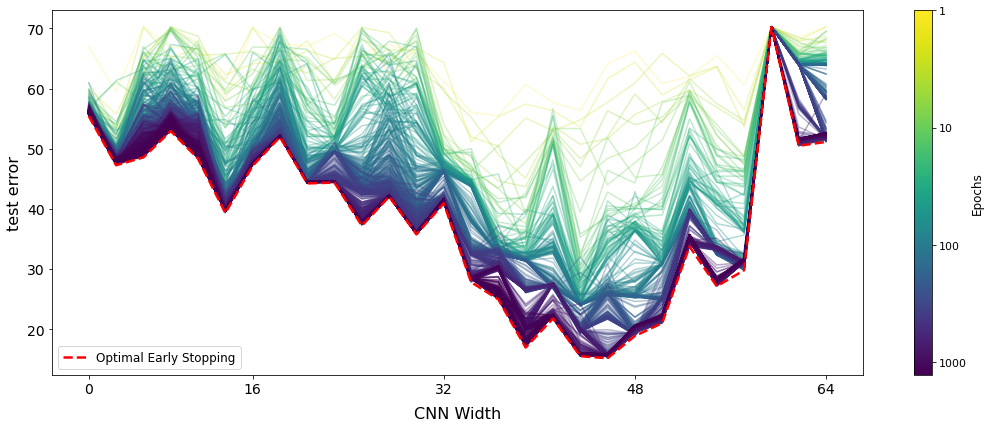

In [81]:
depth = 5
path = "experimental_results_cifar10/"
results_10 = load_results(path + f"conv_nets_depth_{depth}_10pct_noise_alpha_0_1.pkl")
base = 1.001
p = 0.25


def rescale_cmap(name, rescale):
    cmap = plt.cm.get_cmap(name)
    colors = []
    for i in range(256):
        x = i / 256
        colors += [cmap(rescale(x))]
    return matplotlib.colors.ListedColormap(colors)


def scale(maxIdx, i):
    return np.log(i) / np.log(maxIdx)


test_acc = 100 * (1 - results_10.get("val_accuracy"))
test_acc = 1.0 - (1 - p) * (1 - test_acc) + test_acc * p / 9.0  # noisy test


maxIdx = test_acc.shape[1]
idx = np.unique(
    np.array(base ** np.arange(0, np.log(maxIdx) / np.log(base)), dtype=int)
)

fig, ax1 = plt.subplots(1, 1, figsize=(15, 6), sharex=True)

# cos: skews more colors to the middle of the range
# x**a: skews more colors towards the beginning/end of the range for larger/smaller a
# p cos(...) + q x: controls strength of rescaling
cmap = rescale_cmap(
    "viridis", lambda x: 0.5 * (1 - np.cos(np.pi * x ** 0.7)) / 2 + 0.5 * x
)
for i, j in enumerate(idx):
    # s = j / len(idx)
    s = scale(maxIdx, j)

    alpha = min(0.2 * np.sqrt(s) + 0.2, 1)
    if s == 1.0:
        alpha = 1.0
    ax1.plot(test_acc[:, i], linestyle="-", color=cmap(1.0 - s), alpha=alpha)

ax1.plot(
    test_acc.min(axis=1),
    linestyle="dashed",
    color="red",
    lw=2.5,
    label="Optimal Early Stopping",
)

ax1.set_ylabel("test error", fontsize=16)
ax1.set_xlabel("CNN Width",  fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.xaxis.labelpad = 10
ax1.yaxis.labelpad = 5


ax1.set_xticks([0, 6, 13, 20, 27])
ax1.set_xticklabels([0, 16, 32, 48, 64])

ax1.legend(fontsize=12)
plt.tight_layout()

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])

ticks = 1 - scale(maxIdx, [1, 10, 100, 1000])
# print(ticks)

cb = plt.colorbar(sm, ticks=ticks)
cb.ax.set_yticklabels(["1", "10", "100", "1000"], fontsize=11)
cb.set_label("Epochs", fontsize=12)

fig.savefig('learning_dynamics_alpha_0_1.png', dpi=250)

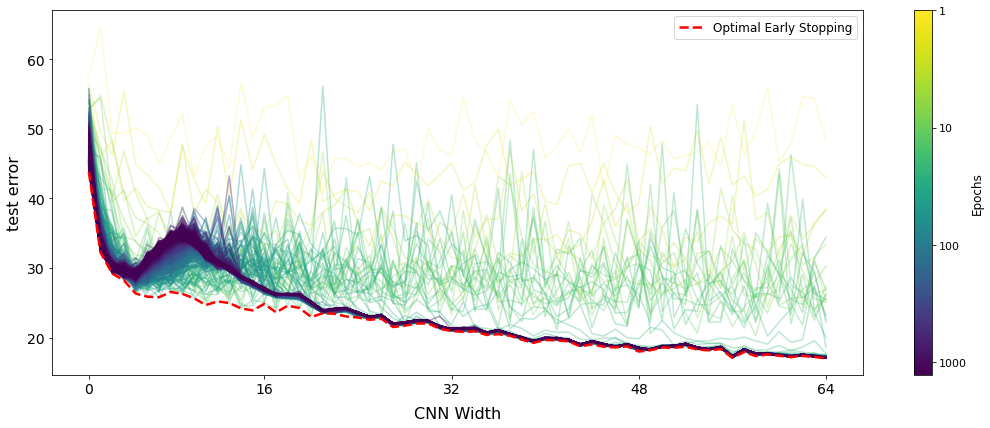

In [82]:
depth = 5
path = "experimental_results_cifar10/"
results_10 = load_results(path + f"conv_nets_depth_{depth}_10pct_noise_alpha_1.pkl")
base = 1.001
p = 0.25


def rescale_cmap(name, rescale):
    cmap = plt.cm.get_cmap(name)
    colors = []
    for i in range(256):
        x = i / 256
        colors += [cmap(rescale(x))]
    return matplotlib.colors.ListedColormap(colors)


def scale(maxIdx, i):
    return np.log(i) / np.log(maxIdx)


test_acc = 100 * (1 - results_10.get("val_accuracy"))
test_acc = 1.0 - (1 - p) * (1 - test_acc) + test_acc * p / 9.0  # noisy test


maxIdx = test_acc.shape[1]
idx = np.unique(
    np.array(base ** np.arange(0, np.log(maxIdx) / np.log(base)), dtype=int)
)

fig, ax1 = plt.subplots(1, 1, figsize=(15, 6), sharex=True)

# cos: skews more colors to the middle of the range
# x**a: skews more colors towards the beginning/end of the range for larger/smaller a
# p cos(...) + q x: controls strength of rescaling
cmap = rescale_cmap(
    "viridis", lambda x: 0.5 * (1 - np.cos(np.pi * x ** 0.7)) / 2 + 0.5 * x
)
for i, j in enumerate(idx):
    # s = j / len(idx)
    s = scale(maxIdx, j)

    alpha = min(0.2 * np.sqrt(s) + 0.2, 1)
    if s == 1.0:
        alpha = 1.0
    ax1.plot(test_acc[:, i], linestyle="-", color=cmap(1.0 - s), alpha=alpha)

ax1.plot(
    test_acc.min(axis=1),
    linestyle="dashed",
    color="red",
    lw=2.5,
    label="Optimal Early Stopping",
)

ax1.set_ylabel("test error", fontsize=16)
ax1.set_xlabel("CNN Width",  fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.xaxis.labelpad = 10
ax1.yaxis.labelpad = 5

ax1.set_xticks([0, 15, 31, 47, 63])
ax1.set_xticklabels([0, 16, 32, 48, 64])

ax1.legend(fontsize=12)
plt.tight_layout()

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])

ticks = 1 - scale(maxIdx, [1, 10, 100, 1000])

cb = plt.colorbar(sm, ticks=ticks)
cb.ax.set_yticklabels(["1", "10", "100", "1000"], fontsize=11)
cb.set_label("Epochs", fontsize=12)

fig.savefig('learning_dynamics_alpha_1.png', dpi=250)

In [39]:
path = "experimental_results_cifar10/"
# plot_loss_vs_epoch_from_file(path + f"conv_nets_depth_5_10pct_noise_alpha_0_25.pkl", [])

d = load_results(path + f"conv_nets_depth_5_10pct_noise_alpha_0_75.pkl")

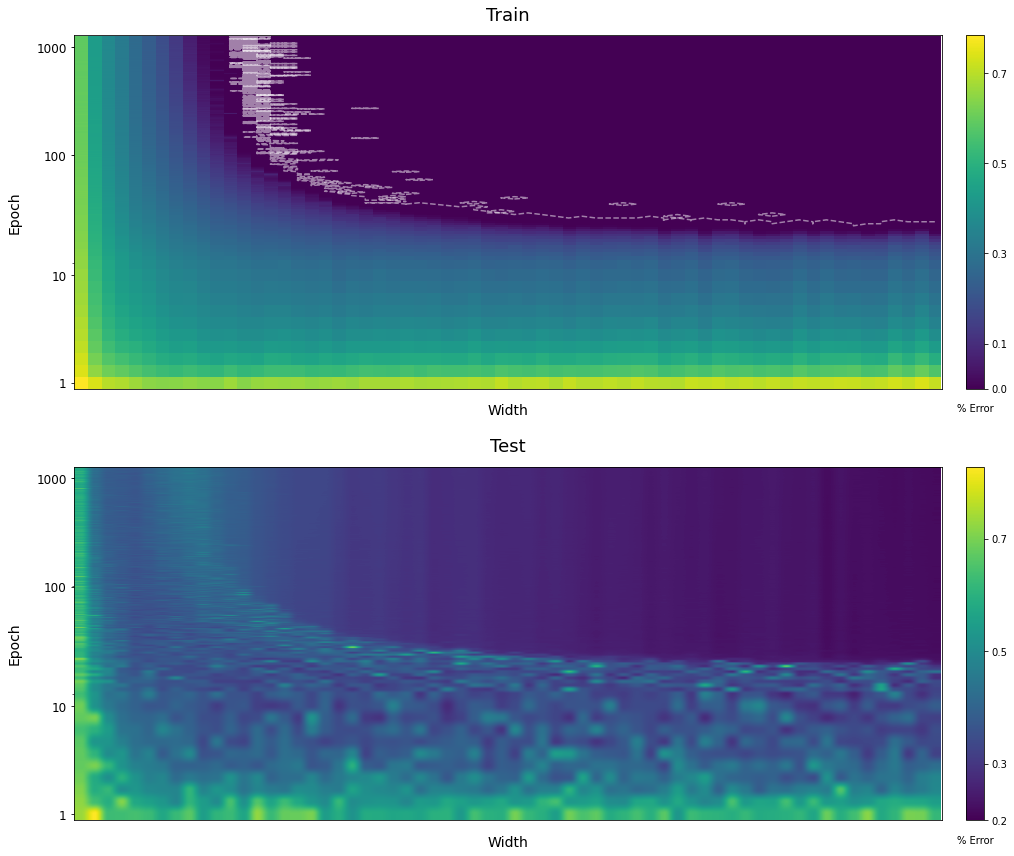

In [195]:
plot_loss_vs_epoch_from_file(path + f"conv_nets_depth_5_10pct_noise_alpha_1.pkl", [100], contour_levels=[])

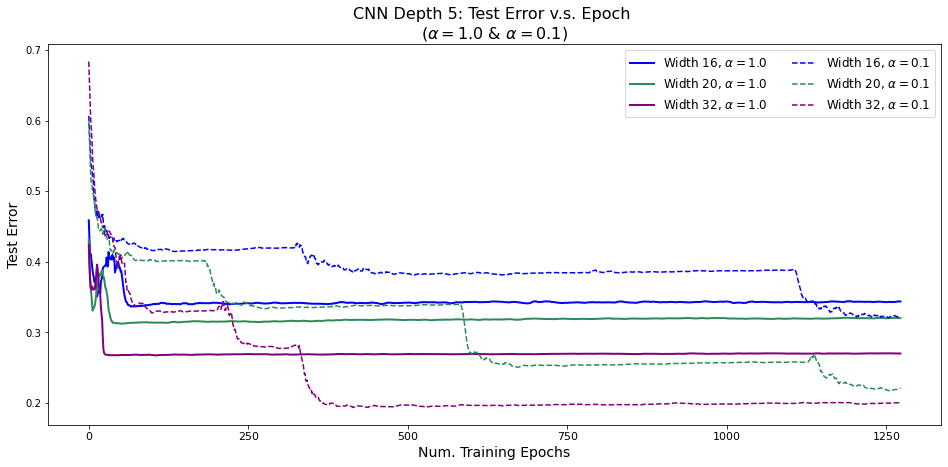

In [369]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

path = "experimental_results_cifar10/"

fs_legend = 12
fs_label = 14
plt.figure(figsize=(16, 7))

colors = ['blue', 'seagreen', 'purple']

d = load_results(path + f"conv_nets_depth_5_10pct_noise_alpha_1.pkl")
for i, c in zip([16, 20, 32], colors):
    plt.plot(
        moving_average(1-d['val_accuracy'][i-1].T, 10), 
        label=r"Width {}, $\alpha = 1.0$".format(d['widths'][i-1]),
        color=c,
        ls='-',
        lw=2
    )

d = load_results(path + f"conv_nets_depth_5_10pct_noise_alpha_0_1.pkl")
for i, c in zip([16, 17, 20], colors):
    plt.plot(
        moving_average(1-d['val_accuracy'][i-1].T, 10), 
         label=r"Width {}, $\alpha = 0.1$".format(d['widths'][i-1]),
        color=c,
        ls='--'
    )


plt.title('CNN Depth 5: Test Error v.s. Epoch \n' + r'($\alpha=1.0$ & $\alpha=0.1)$', fontsize=16)
    
plt.legend(fontsize=fs_legend, ncol=2)
plt.xticks([0, 250, 500, 750, 1000, 1250], labels=[0, 250, 500, 750, 1000, 1250], fontsize=11)

plt.xlabel("Num. Training Epochs", fontsize=fs_label)
plt.ylabel("Test Error", fontsize=fs_label)

plt.savefig('Training_dynamics_Test_error_comparison_width_16_32.png', dpi=250)
plt.show()

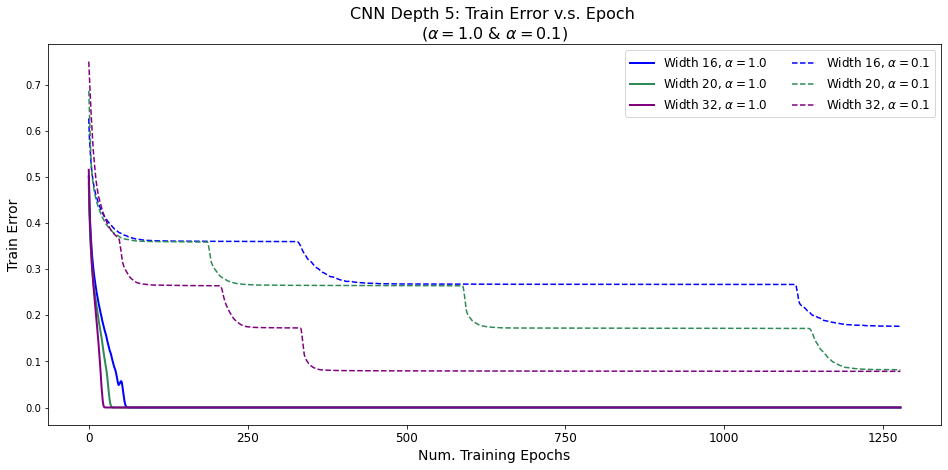

In [371]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

path = "experimental_results_cifar10/"

fs_legend = 12
fs_label = 14
plt.figure(figsize=(16, 7))

colors = ['blue', 'seagreen', 'purple']

d = load_results(path + f"conv_nets_depth_5_10pct_noise_alpha_1.pkl")
for i, c in zip([16, 20, 32], colors):
    plt.plot(
        moving_average(1-d['accuracy'][i-1].T, 5), 
        label=r"Width {}, $\alpha = 1.0$".format(d['widths'][i-1]),
        color=c,
        ls='-',
        lw=2
    )

d = load_results(path + f"conv_nets_depth_5_10pct_noise_alpha_0_1.pkl")
for i, c in zip([16, 17, 20], colors):
    plt.plot(
        moving_average(1-d['accuracy'][i-1].T, 5), 
        label=r"Width {}, $\alpha = 0.1$".format(d['widths'][i-1]),
        color=c,
        ls='--'
    )
    

plt.title('CNN Depth 5: Train Error v.s. Epoch \n' + r'($\alpha=1.0$ & $\alpha=0.1)$', fontsize=16)
    
plt.legend(fontsize=fs_legend, ncol=2)
plt.xticks([0, 250, 500, 750, 1000, 1250], labels=[0, 250, 500, 750, 1000, 1250], fontsize=12)

plt.xlabel("Num. Training Epochs", fontsize=fs_label)
plt.ylabel("Train Error", fontsize=fs_label)

plt.savefig('Training_dynamics_Train_error_comparison_width_16_32.png', dpi=250)
plt.show()

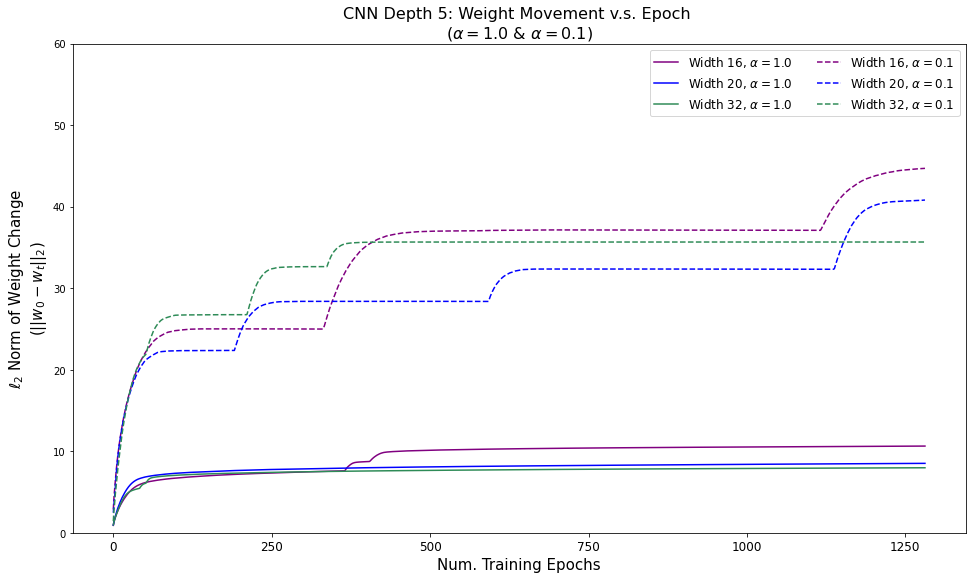

In [368]:
path = "experimental_results_cifar10/"

fs_legend = 12
fs_label = 15
plt.figure(figsize=(16, 9))

weight_metric = 'weight_change_l2'
y_scale = 60

colors = ['purple', 'blue', 'seagreen']

d = pkl.load(open(path + f"conv_nets_depth_5_10pct_noise_alpha_116_20_32.pkl", 'rb'))

weight_changes_l2_w16 = np.array(d['conv_net_depth_5_width_16'][weight_metric])
weight_changes_l2_w20 = np.array(d['conv_net_depth_5_width_20'][weight_metric])
weight_changes_l2_w32 = np.array(d['conv_net_depth_5_width_32'][weight_metric])

weight_changes_l2 = [weight_changes_l2_w16, weight_changes_l2_w20, weight_changes_l2_w32]
widths = [16, 20, 32]

for weight_change, c, width in zip(weight_changes_l2, colors, widths):
    plt.plot(
        weight_change.mean(axis=1),
        label=r"Width {}, $\alpha = 1.0$".format(width),
        color=c
    )

d = pkl.load(open(path + f"conv_nets_depth_5_10pct_noise_alpha_0_1.pkl", 'rb'))

weight_changes_l2_w16 = np.array(d['conv_net_depth_5_width_16'][weight_metric])
weight_changes_l2_w20 = np.array(d['conv_net_depth_5_width_20'][weight_metric])
weight_changes_l2_w32 = np.array(d['conv_net_depth_5_width_32'][weight_metric])

weight_changes_l2 = [weight_changes_l2_w16, weight_changes_l2_w20, weight_changes_l2_w32]

for weight_change, c, width in zip(weight_changes_l2, colors, widths):
    plt.plot(
        weight_change.mean(axis=1),
        label=r"Width {}, $\alpha = 0.1$".format(width),
        color=c,
        ls='--'
    )

plt.title('CNN Depth 5: Weight Movement v.s. Epoch \n' + r'($\alpha=1.0$ & $\alpha=0.1)$', fontsize=16)
    
plt.ylim(0, y_scale)
plt.legend(fontsize=12, ncol=2)
plt.xticks([0, 250, 500, 750, 1000, 1250], labels=[0, 250, 500, 750, 1000, 1250], fontsize=12)

plt.xlabel("Num. Training Epochs", fontsize=fs_label)

if weight_metric == 'weight_change_l2':
    plt.ylabel(r"$\ell_{2}$ Norm of Weight Change" + "\n" + "($\||w_0 - w_{t}\||_{2}$)", fontsize=fs_label)
else:
    plt.ylabel(r"$\ell_{\inf}$ Norm of Weight Change" + "\n" + "($\max_{i}{\|w_0 - w_{t}\|_{i}}$)", fontsize=fs_label)
    
plt.savefig(f'Training_dynamics_{weight_metric}_comparison_width_16_32.png', dpi=250)
plt.show()

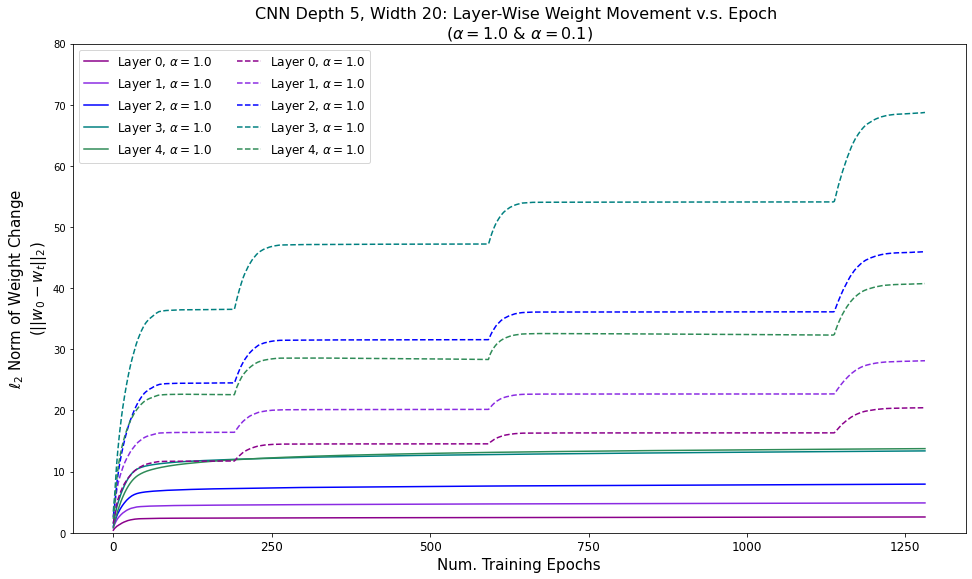

In [365]:
path = "experimental_results_cifar10/"

fs_legend = 12
fs_label = 15
plt.figure(figsize=(16, 9))

weight_metric = 'weight_change_l2'
y_scale = 80

colors = ['darkmagenta', 'blueviolet', 'blue', 'teal', 'seagreen']
width = 20

d = pkl.load(open(path + f"conv_nets_depth_5_10pct_noise_alpha_116_20_32.pkl", 'rb'))
weight_changes_l2_w32 = np.array(d[f'conv_net_depth_5_width_{width}'][weight_metric])
layers = [0, 1, 2, 3, 4]

for weight_change, c, layer in zip(weight_changes_l2_w32.T, colors, layers):
    plt.plot(
        weight_change,
        label=r"Layer {}, $\alpha = 1.0$".format(layer),
        color=c
    )

d = pkl.load(open(path + f"conv_nets_depth_5_10pct_noise_alpha_0_1.pkl", 'rb'))
weight_changes_l2_w32 = np.array(d[f'conv_net_depth_5_width_{width}'][weight_metric])
layers = [0, 1, 2, 3, 4]

for weight_change, c, layer in zip(weight_changes_l2_w32.T, colors, layers):
    plt.plot(
        weight_change,
        label=r"Layer {}, $\alpha = 1.0$".format(layer),
        color=c,
        ls='--'
    )

plt.title(
    f'CNN Depth 5, Width {width}: Layer-Wise Weight Movement v.s. Epoch \n' + r'($\alpha=1.0$ & $\alpha=0.1)$', 
    fontsize=16
)
    
plt.ylim(0, y_scale)
plt.legend(fontsize=12, ncol=2, loc='upper left')
plt.xticks([0, 250, 500, 750, 1000, 1250], labels=[0, 250, 500, 750, 1000, 1250], fontsize=12)

plt.xlabel("Num. Training Epochs", fontsize=fs_label)

if weight_metric == 'weight_change_l2':
    plt.ylabel(r"$\ell_{2}$ Norm of Weight Change" + "\n" + "($\||w_0 - w_{t}\||_{2}$)", fontsize=fs_label)
else:
    plt.ylabel(r"$\ell_{\inf}$ Norm of Weight Change" + "\n" + "($\max_{i}{\|w_0 - w_{t}\|_{i}}$)", fontsize=fs_label)
    
plt.savefig(f'Training_dynamics_layer_wise_{weight_metric}_comparison_width_{width}.png', dpi=250)
plt.show()

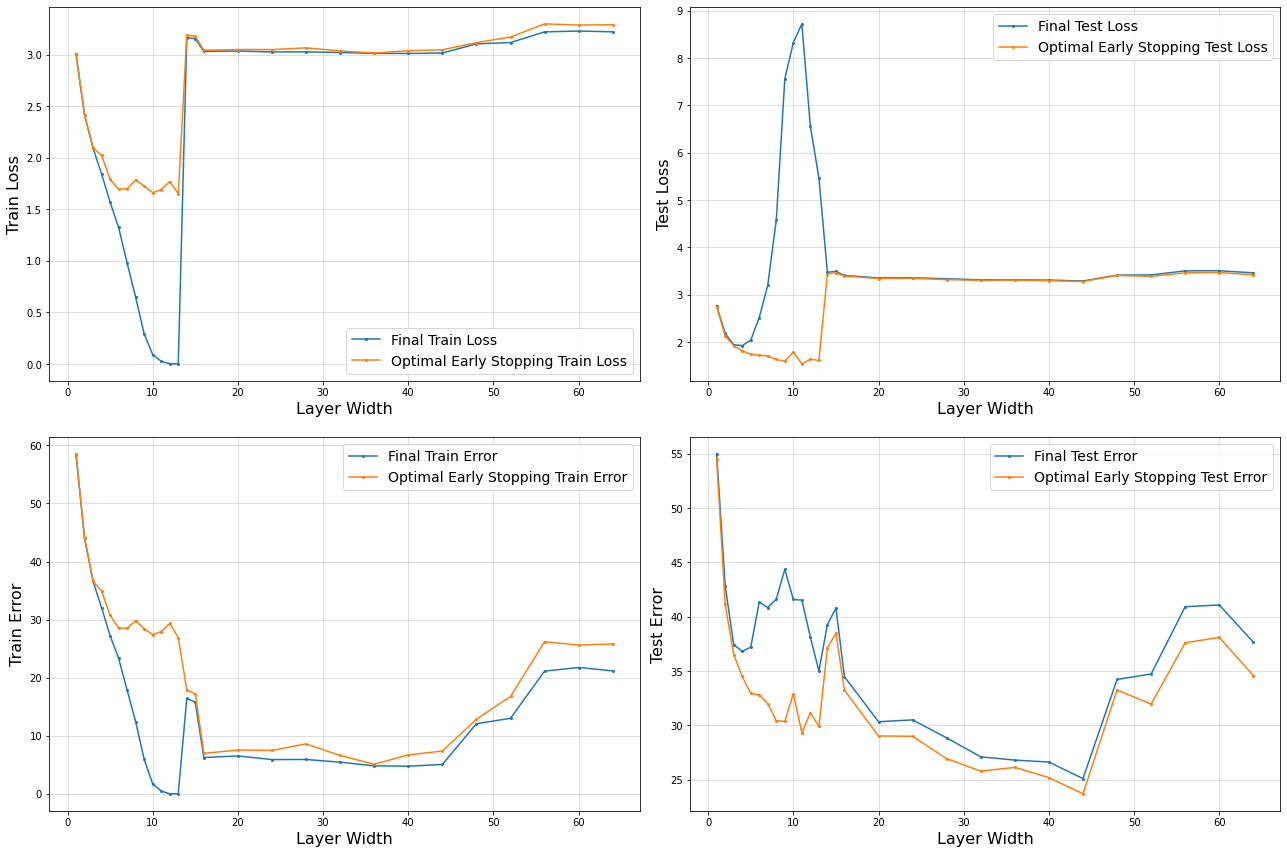

In [102]:
path = "experimental_results_cifar10/"
plot_loss_from_file("experimental_results_cifar10/conv_nets_depth_5_10pct_noise_alpha_0_75.pkl")

In [116]:
from utils.train_utils import get_scaled_sparse_categorical_loss

width = 8

model, model_id = make_convNet([32, 32, 3], 5, init_channels=width)
weights_path = f"trained_model_weights_cifar10\conv_nets_depth_5_10pct_noise_alpha_0.75\conv_net_depth_5_width_{width}"
model.load_weights(filepath=weights_path)

(x_train, y_train), (x_test, y_test), image_shape, mislabel_idx = load_data('cifar10', .1)

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001),
    loss=get_scaled_sparse_categorical_loss(0.5),
    metrics=["accuracy"],
)

model.evaluate(x_train, y_train)

ValueError: too many values to unpack (expected 3)